<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc" style="margin-top: 1em;"><ul class="toc-item"><li><span><a href="#prepare" data-toc-modified-id="prepare-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>prepare</a></span></li><li><span><a href="#6-axis-data-during-playing" data-toc-modified-id="6-axis-data-during-playing-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>6-axis data during playing</a></span><ul class="toc-item"><li><span><a href="#sample-rate" data-toc-modified-id="sample-rate-2.1"><span class="toc-item-num">2.1&nbsp;&nbsp;</span>sample rate</a></span></li><li><span><a href="#raw-data" data-toc-modified-id="raw-data-2.2"><span class="toc-item-num">2.2&nbsp;&nbsp;</span>raw data</a></span><ul class="toc-item"><li><span><a href="#Acc.-sensor" data-toc-modified-id="Acc.-sensor-2.2.1"><span class="toc-item-num">2.2.1&nbsp;&nbsp;</span>Acc. sensor</a></span><ul class="toc-item"><li><span><a href="#before-zero-adjust" data-toc-modified-id="before-zero-adjust-2.2.1.1"><span class="toc-item-num">2.2.1.1&nbsp;&nbsp;</span><font color="red">before</font> zero adjust</a></span></li><li><span><a href="#after-zero-adjust" data-toc-modified-id="after-zero-adjust-2.2.1.2"><span class="toc-item-num">2.2.1.2&nbsp;&nbsp;</span><font color="red">after</font> zero adjust</a></span></li></ul></li><li><span><a href="#Gyr.-sensor" data-toc-modified-id="Gyr.-sensor-2.2.2"><span class="toc-item-num">2.2.2&nbsp;&nbsp;</span>Gyr. sensor</a></span><ul class="toc-item"><li><span><a href="#before-zero-adjust" data-toc-modified-id="before-zero-adjust-2.2.2.1"><span class="toc-item-num">2.2.2.1&nbsp;&nbsp;</span><font color="red">before</font> zero adjust</a></span></li><li><span><a href="#after-zero-adjust" data-toc-modified-id="after-zero-adjust-2.2.2.2"><span class="toc-item-num">2.2.2.2&nbsp;&nbsp;</span><font color="red">after</font> zero adjust</a></span></li></ul></li></ul></li></ul></li></ul></div>

# prepare

In [1]:
import taiko as tk
import seaborn as sns
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

DRUMMERS = 8
SONGS = 4
ORDERS = [3, 3, 3, 4]

Using TensorFlow backend.


# 6-axis data during playing

Here we only retrieve <font color='red'>song 1</font>

In [2]:
sns.set(font_scale=2)
WHO = 7
SONG = 1
ORDER = 3

## sample rate

In [3]:
left_diffs = pd.Series()
right_diffs = pd.Series()

for who in range(DRUMMERS):
    play_dict = tk.get_play(who + 1, SONG, ORDER, is_adjust_zero=False, resample=None).play_dict
    left_timestamps = play_dict['L']['timestamp'].diff()
    right_timestamps = play_dict['R']['timestamp'].diff()
    left_diffs = left_diffs.append(left_timestamps, ignore_index=True)
    right_diffs = right_diffs.append(right_timestamps, ignore_index=True)
    
df = pd.DataFrame(data={
    'L': left_diffs,
    'R': right_diffs
})

                  L             R
count  21203.000000  22031.000000
mean       0.044498      0.042832
std        0.018627      0.019122
min        0.025040      0.024680
25%        0.034891      0.031506
50%        0.042842      0.041259
75%        0.048061      0.046604
max        0.459025      0.491320


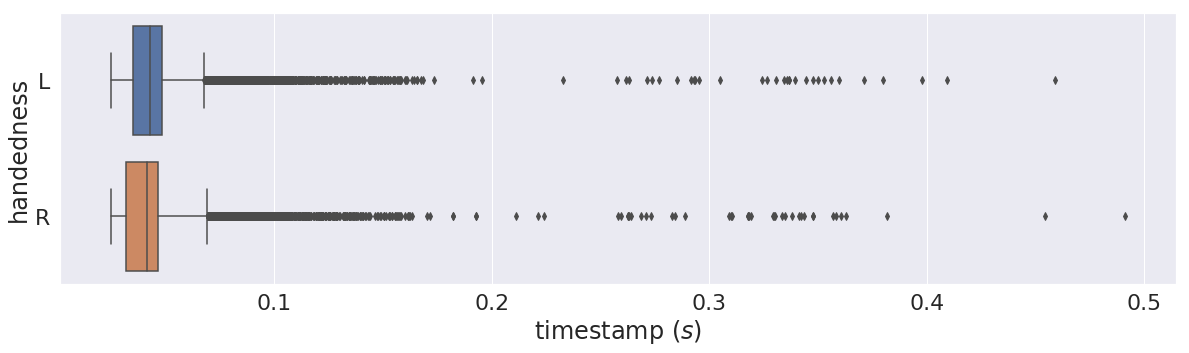

In [4]:
print(df.describe())

plt.figure(figsize=(20, 5))
sns.boxplot(data=df, orient='h')
plt.xlabel('timestamp $(s)$')
plt.ylabel('handedness')
plt.show()

Notice that mins are $0.025$s and $0.024$s.

Hence I resample them by $0.02$s time interval.

## raw data 

We suppose re-sampling is required.

### Acc. sensor

#### <font color='red'>before</font> zero adjust

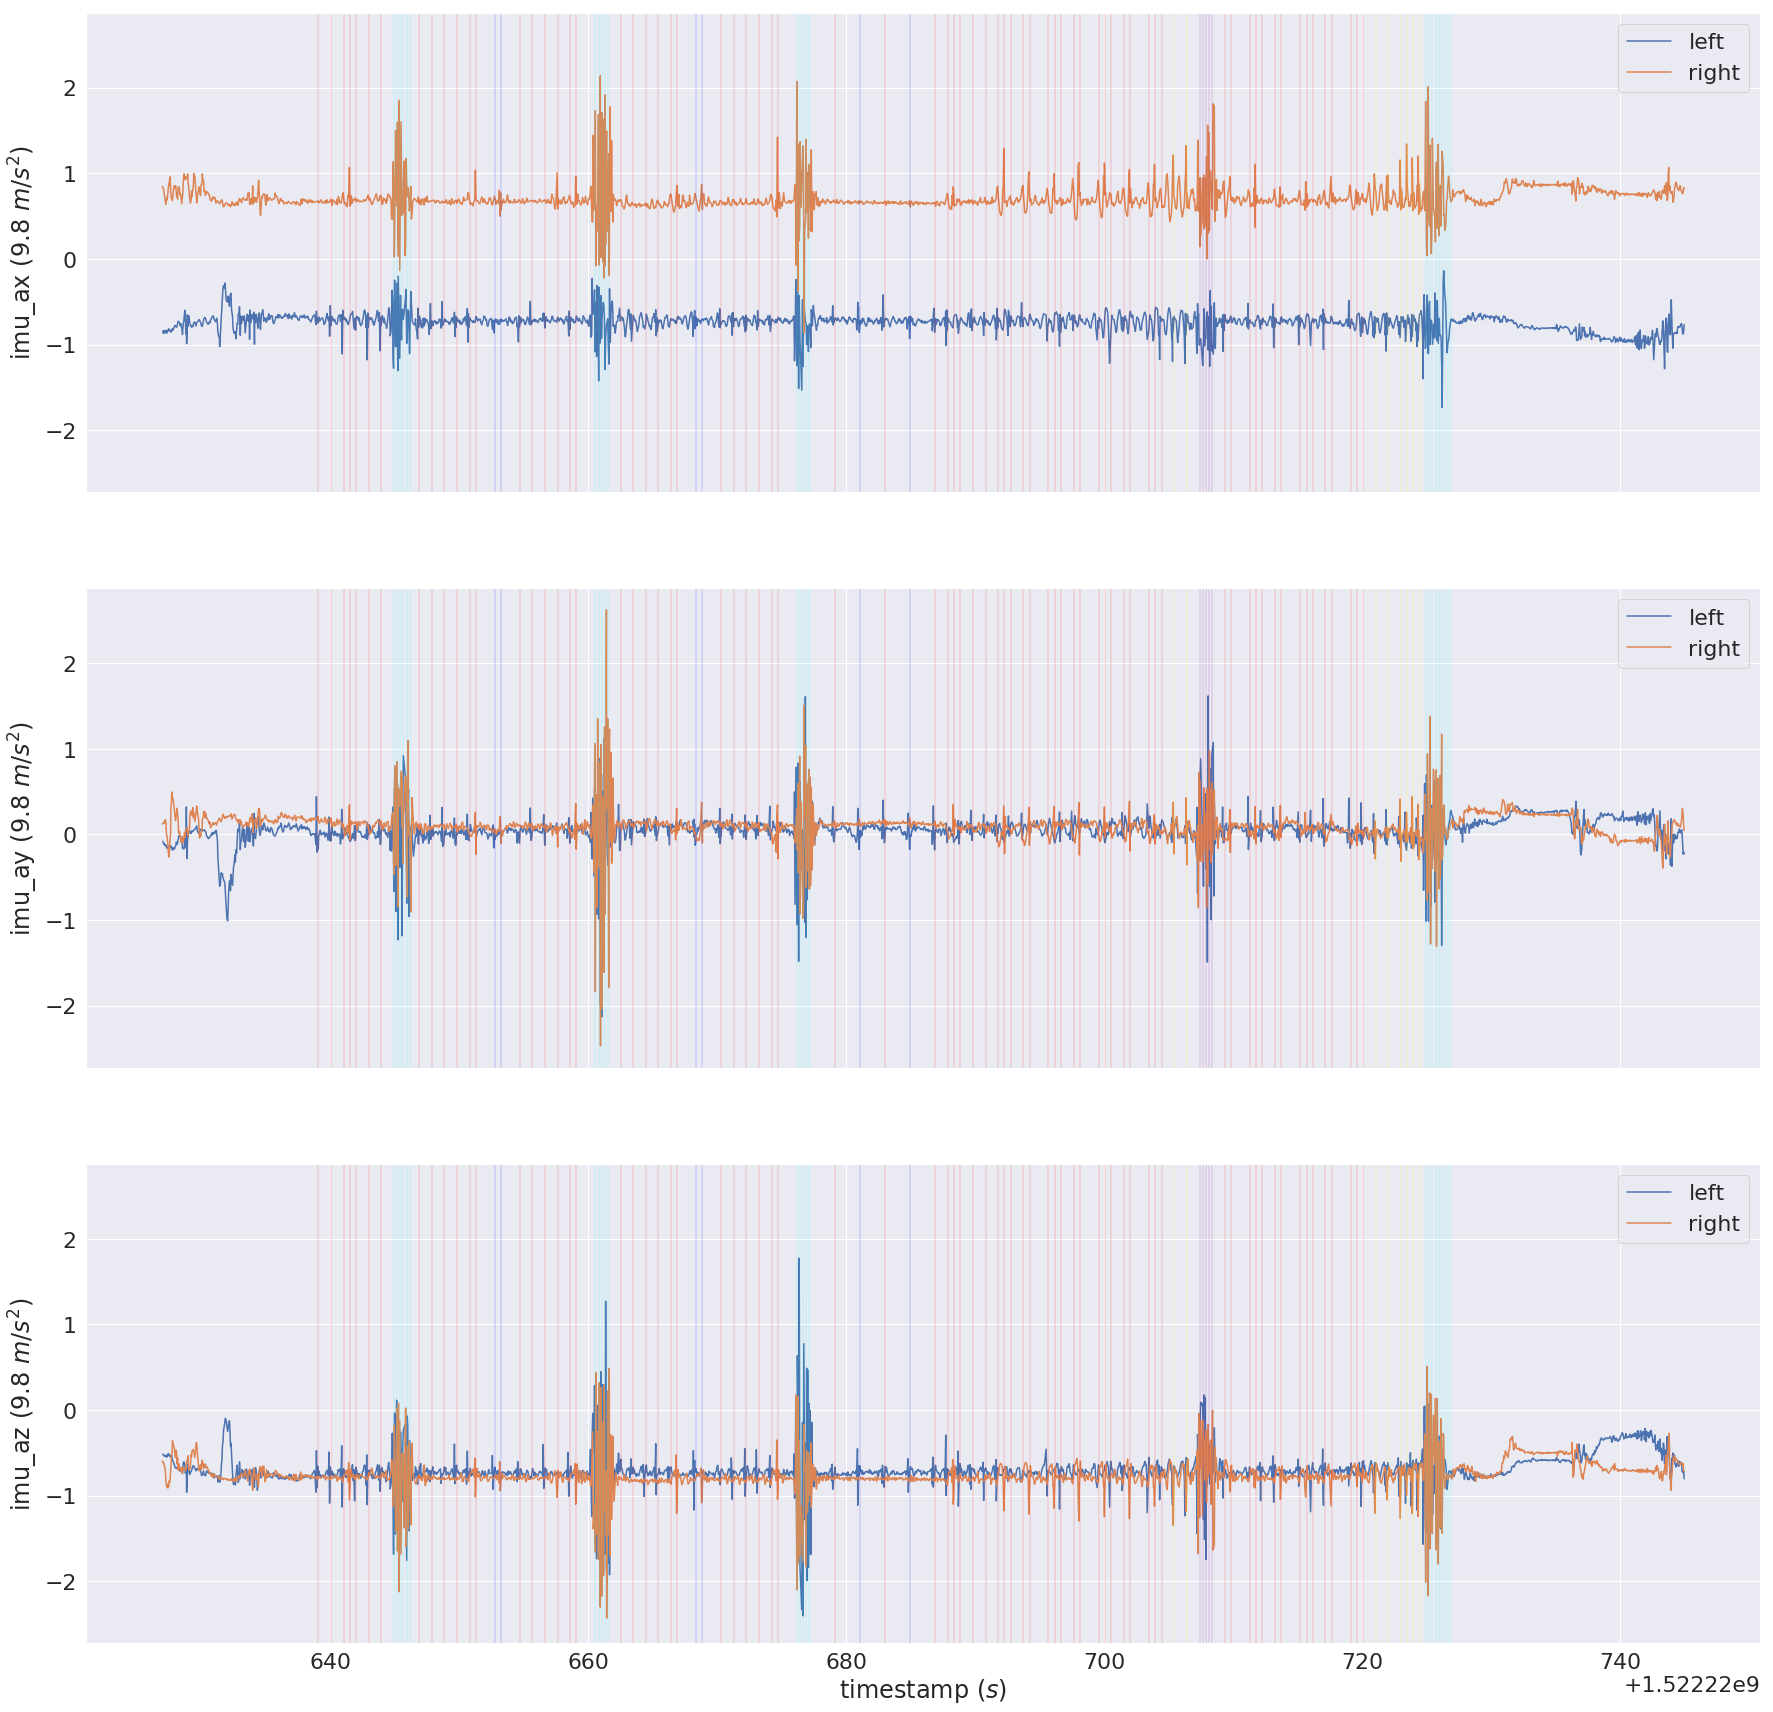

In [5]:
play = tk.get_play(WHO, SONG, ORDER, is_adjust_zero=False, resample='0.02S')


show_cols = tk.ZERO_ADJ_COL[:3]
fig, axes = plt.subplots(nrows=len(show_cols), ncols=1, sharex=True, sharey=True, figsize=(30, 30))
for i_, col in enumerate(show_cols):
    sns.lineplot(data=play.play_dict['L'], x='timestamp', y=col, label='left', ax=axes[i_])
    sns.lineplot(data=play.play_dict['R'], x='timestamp', y=col, label='right', ax=axes[i_])
    axes[i_].set_ylabel(col + ' $(9.8\ m/s^2)$')
    events = play.events
    for id_, _ in enumerate(events):
        event_time = events[id_][0]
        hit_type = events[id_][1]
        if hit_type > 0:
            axes[i_].axvline(event_time, color=tk.COLORS[hit_type], alpha=1, lw=0.2)
plt.xlabel('timestamp $(s)$')
plt.show()

#### <font color='red'>after</font> zero adjust

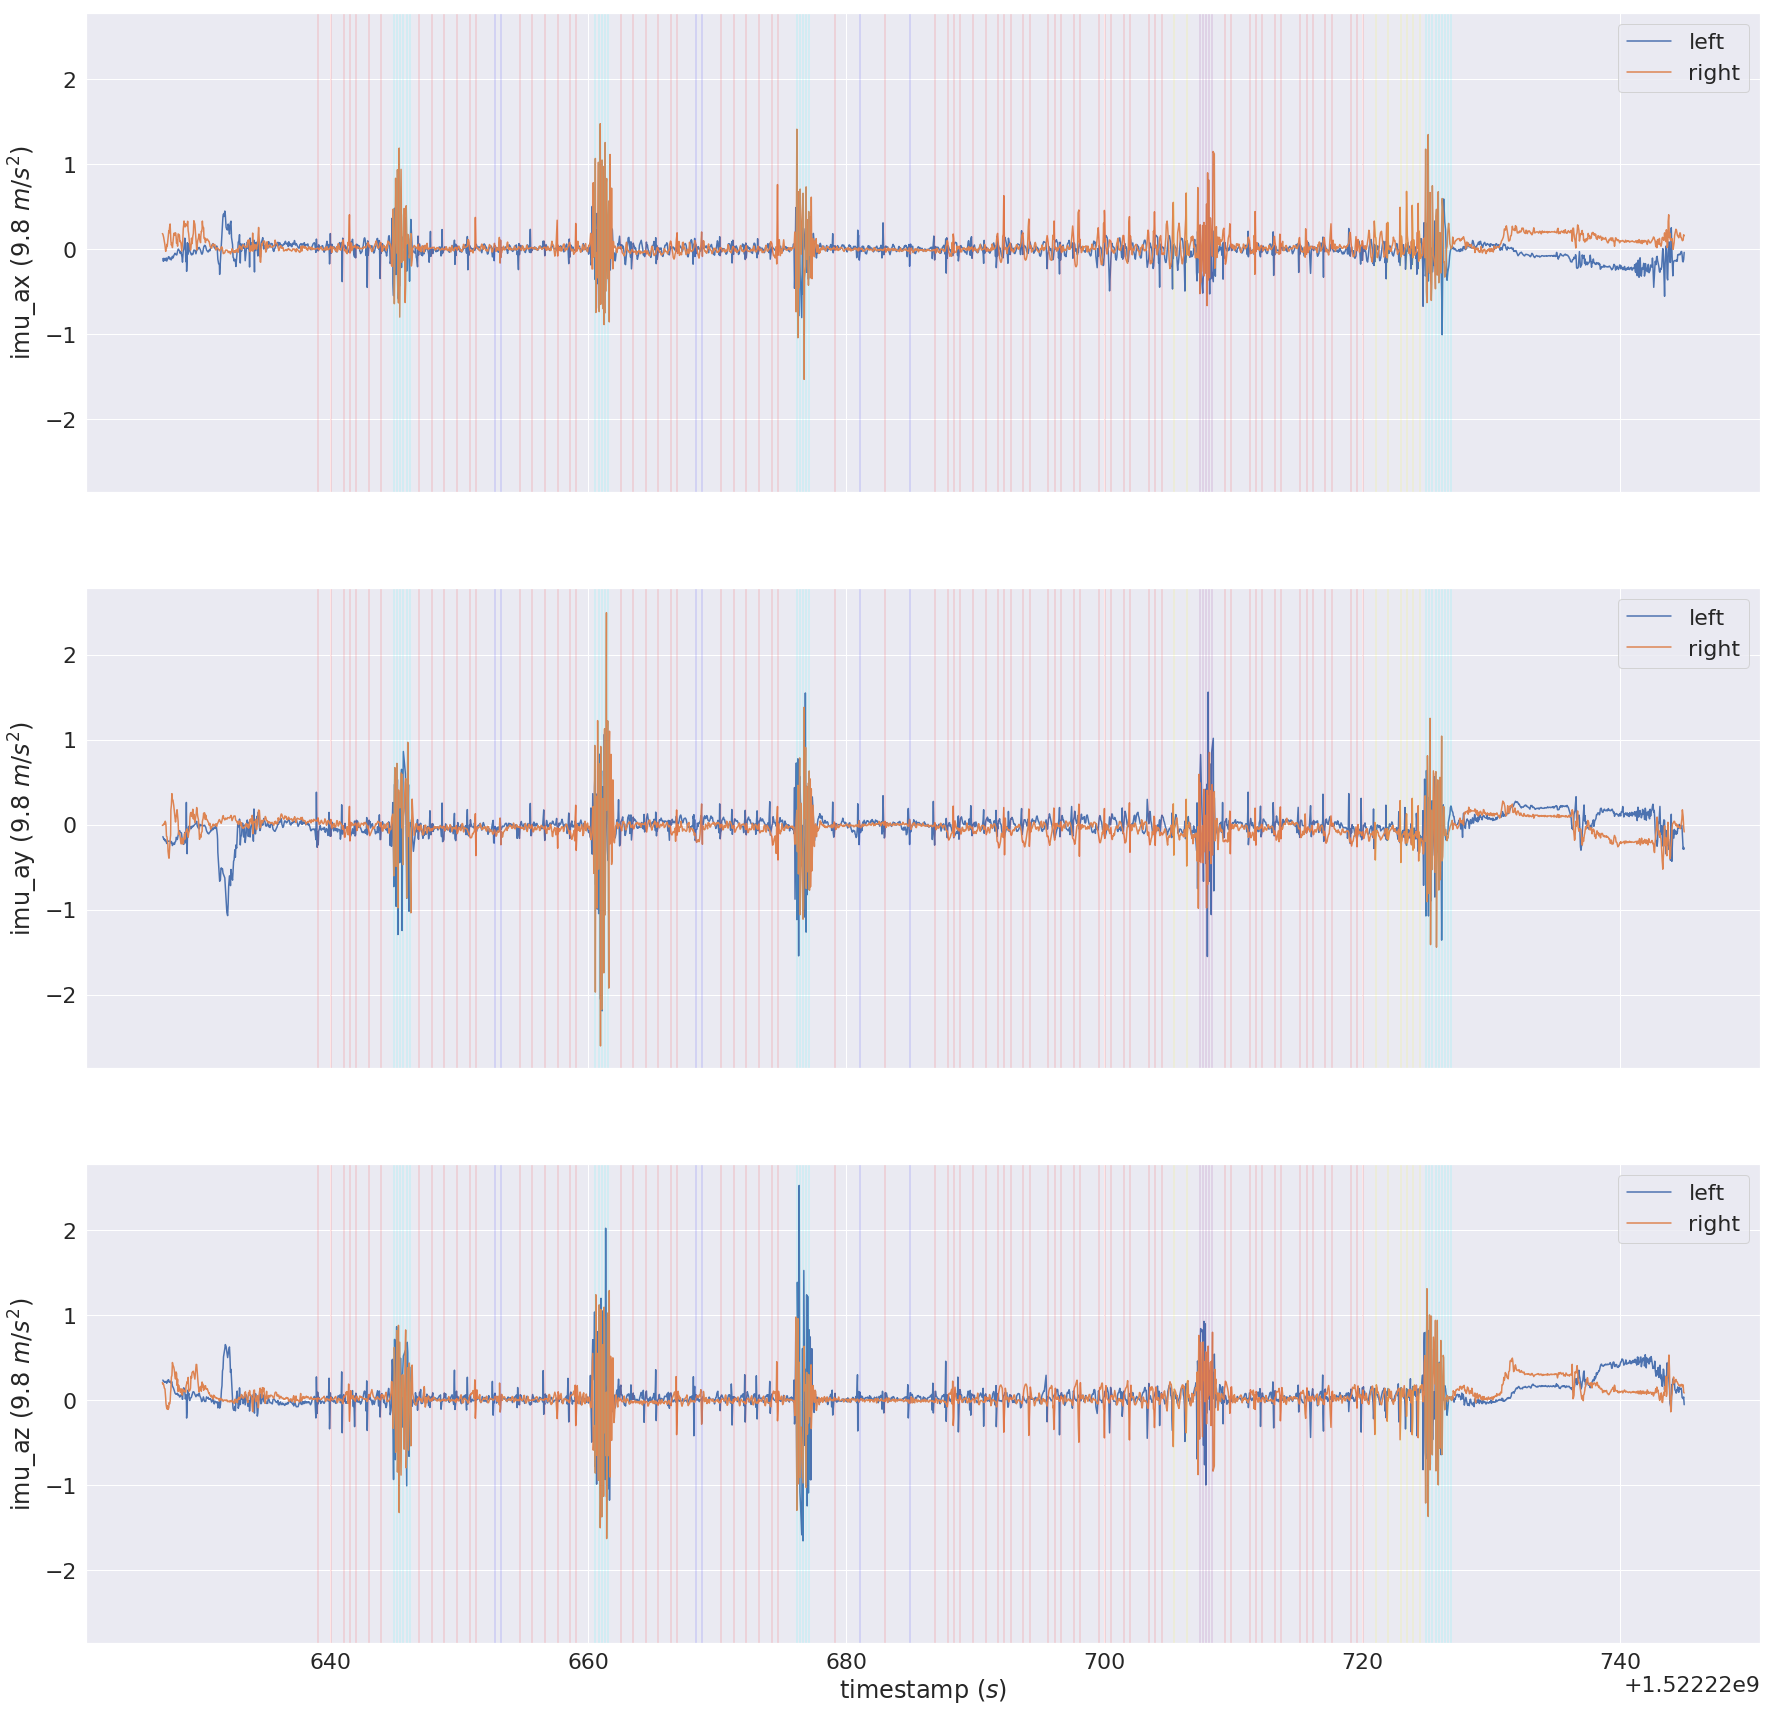

In [6]:
play = tk.get_play(WHO, SONG, ORDER, is_adjust_zero=True, resample='0.02S')


show_cols = tk.ZERO_ADJ_COL[:3]
fig, axes = plt.subplots(nrows=len(show_cols), ncols=1, sharex=True, sharey=True, figsize=(30, 30))
for i_, col in enumerate(show_cols):
    sns.lineplot(data=play.play_dict['L'], x='timestamp', y=col, label='left', ax=axes[i_])
    sns.lineplot(data=play.play_dict['R'], x='timestamp', y=col, label='right', ax=axes[i_])
    axes[i_].set_ylabel(col + ' $(9.8\ m/s^2)$')
    events = play.events
    for id_, _ in enumerate(events):
        event_time = events[id_][0]
        hit_type = events[id_][1]
        if hit_type > 0:
            axes[i_].axvline(event_time, color=tk.COLORS[hit_type], alpha=1, lw=0.2)
plt.xlabel('timestamp $(s)$')
plt.show()

### Gyr. sensor

#### <font color='red'>before</font> zero adjust

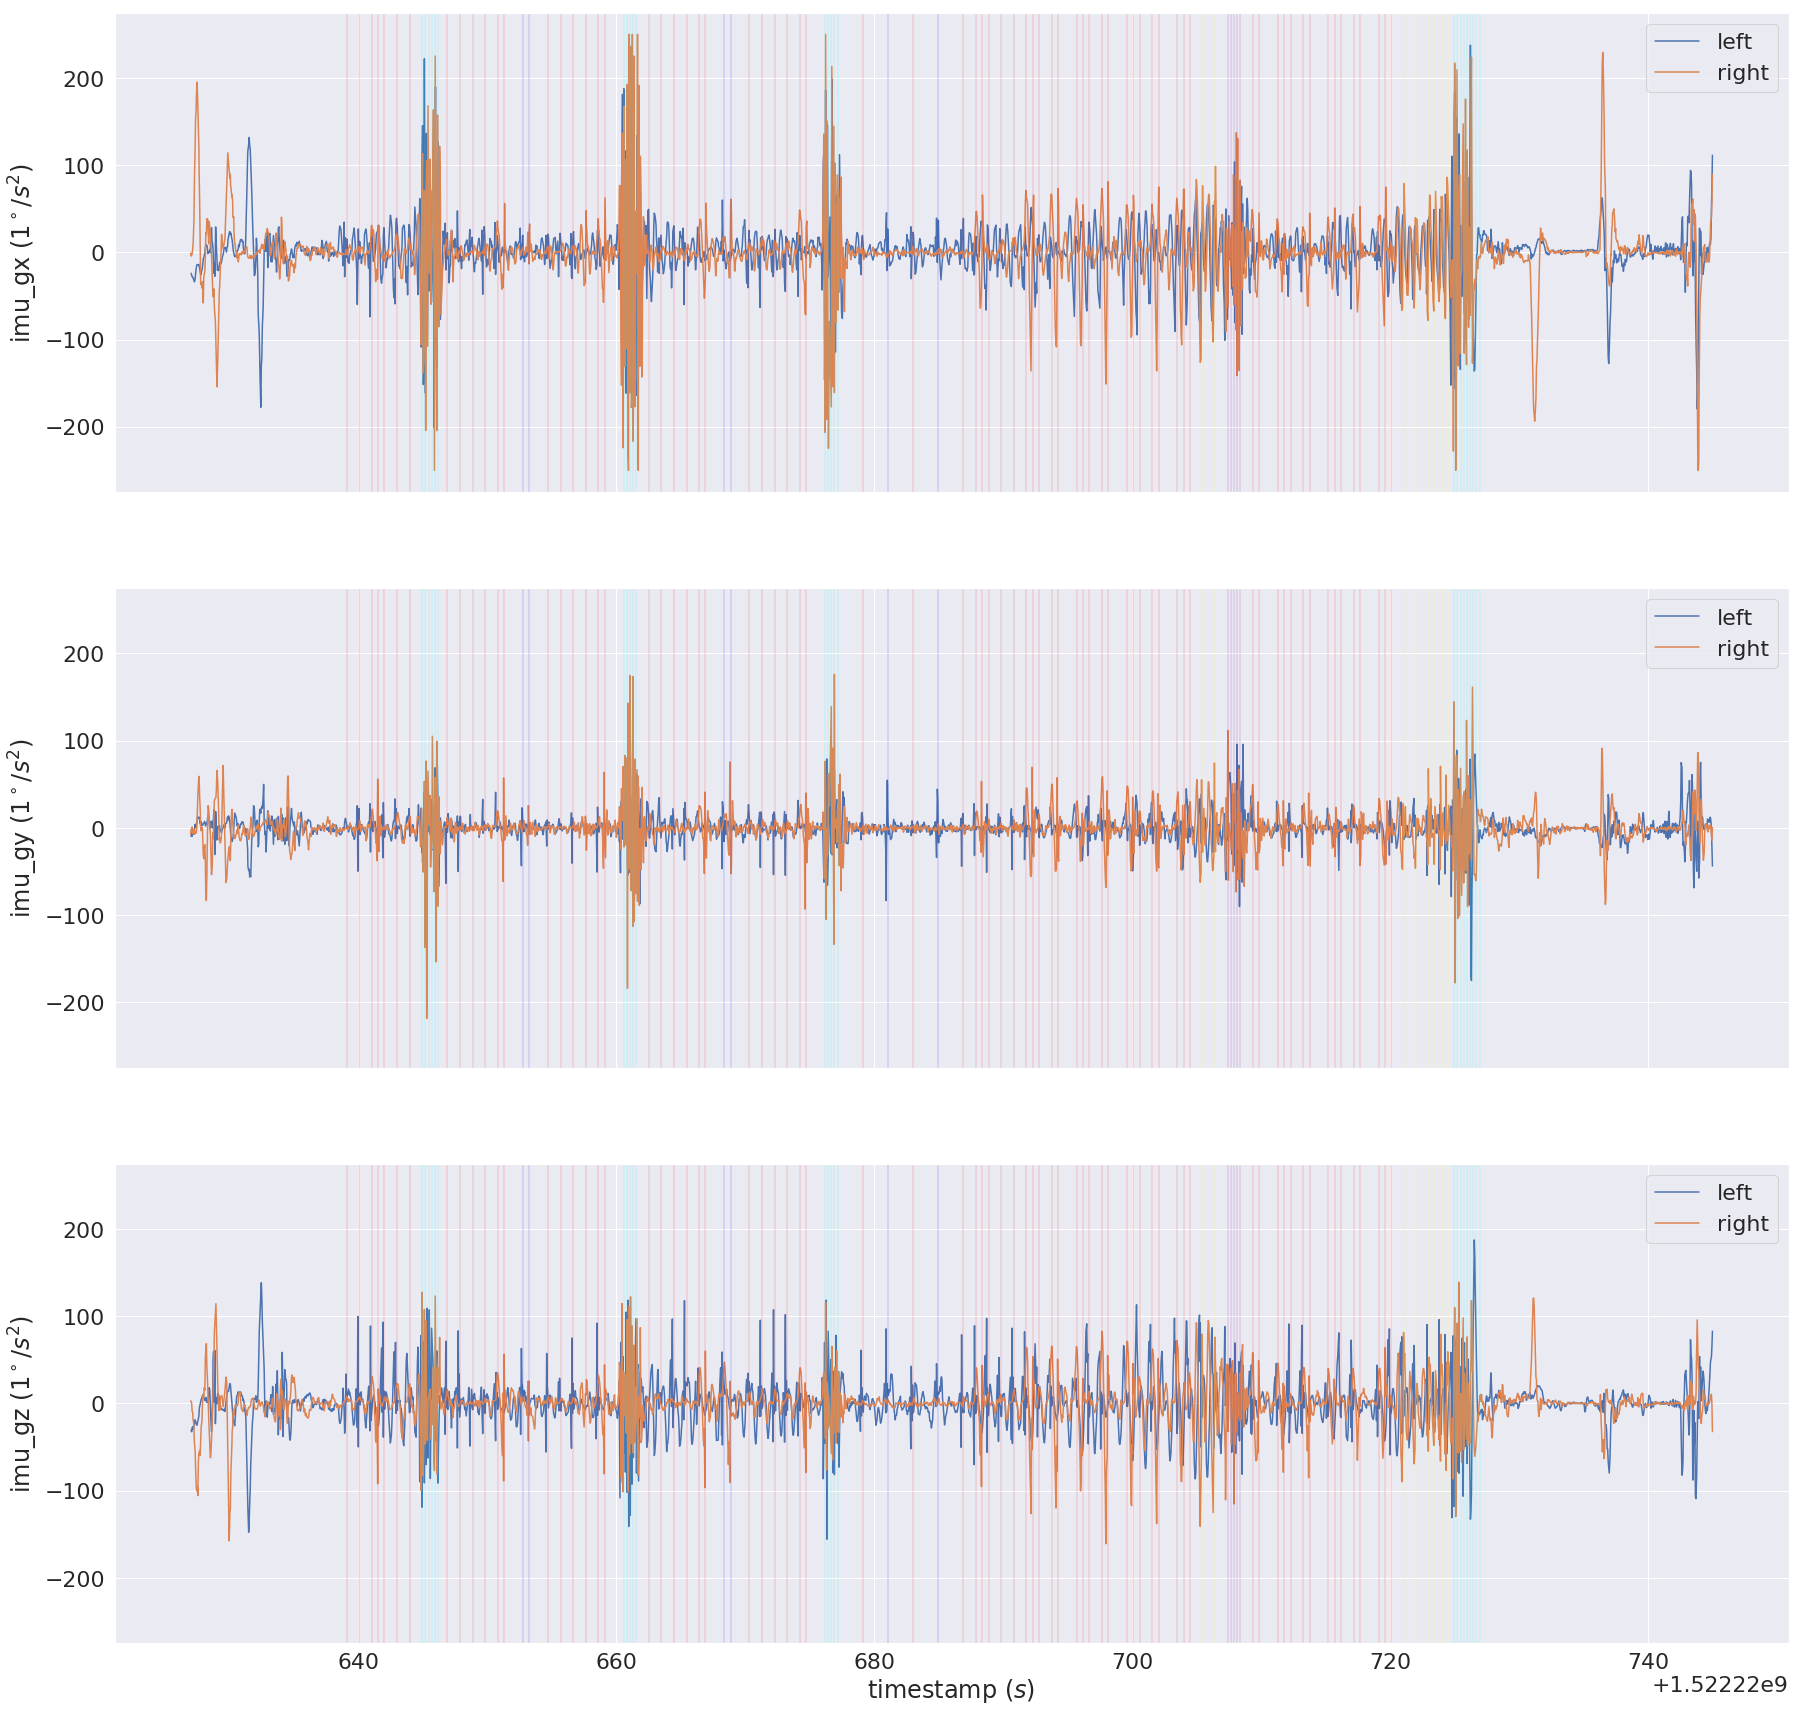

In [7]:
play = tk.get_play(WHO, SONG, ORDER, is_adjust_zero=False, resample='0.02S')


show_cols = tk.ZERO_ADJ_COL[3:6]
fig, axes = plt.subplots(nrows=len(show_cols), ncols=1, sharex=True, sharey=True, figsize=(30, 30))
for i_, col in enumerate(show_cols):
    sns.lineplot(data=play.play_dict['L'], x='timestamp', y=col, label='left', ax=axes[i_])
    sns.lineplot(data=play.play_dict['R'], x='timestamp', y=col, label='right', ax=axes[i_])
    axes[i_].set_ylabel(col + ' $(1^\circ/s^2)$')
    events = play.events
    for id_, _ in enumerate(events):
        event_time = events[id_][0]
        hit_type = events[id_][1]
        if hit_type > 0:
            axes[i_].axvline(event_time, color=tk.COLORS[hit_type], alpha=1, lw=0.2)
plt.xlabel('timestamp $(s)$')
plt.show()

#### <font color='red'>after</font> zero adjust

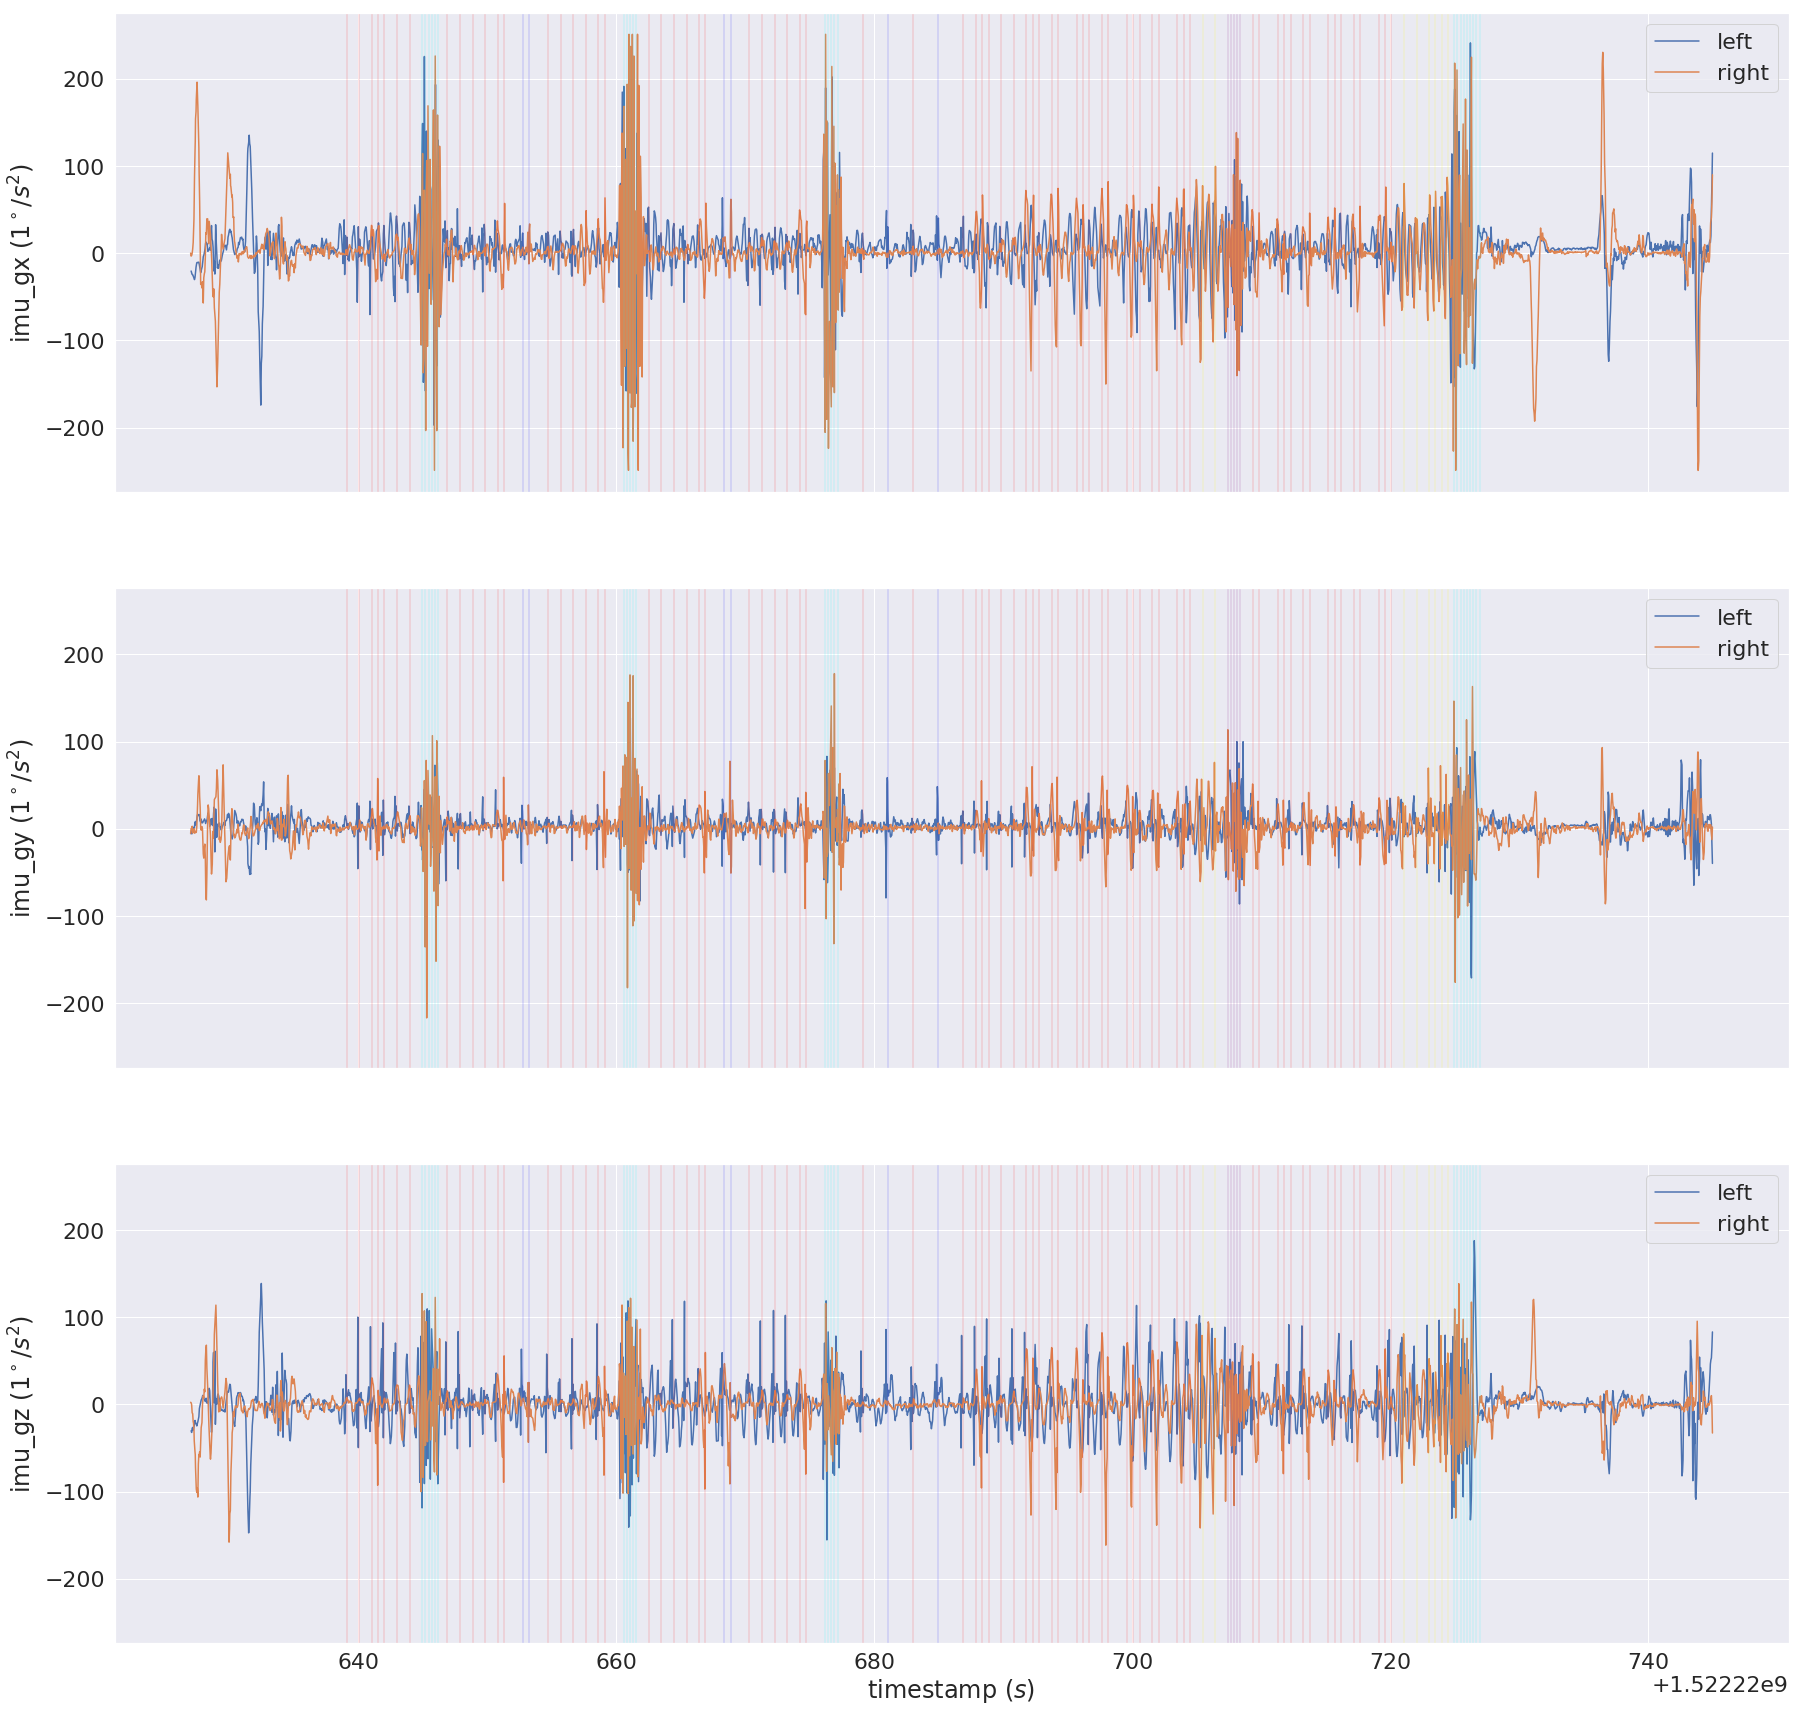

In [8]:
play = tk.get_play(WHO, SONG, ORDER, is_adjust_zero=True, resample='0.02S')


show_cols = tk.ZERO_ADJ_COL[3:6]
fig, axes = plt.subplots(nrows=len(show_cols), ncols=1, sharex=True, sharey=True, figsize=(30, 30))
for i_, col in enumerate(show_cols):
    sns.lineplot(data=play.play_dict['L'], x='timestamp', y=col, label='left', ax=axes[i_])
    sns.lineplot(data=play.play_dict['R'], x='timestamp', y=col, label='right', ax=axes[i_])
    axes[i_].set_ylabel(col + ' $(1^\circ/s^2)$')
    events = play.events
    for id_, _ in enumerate(events):
        event_time = events[id_][0]
        hit_type = events[id_][1]
        if hit_type > 0:
            axes[i_].axvline(event_time, color=tk.COLORS[hit_type], alpha=1, lw=0.2)
plt.xlabel('timestamp $(s)$')
plt.show()